# Resolutions

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from netCDF4 import Dataset, num2date
import pyicon as pyic
import cartopy.crs as ccrs
import glob, os
import xarray as xr
import pandas as pd
import cartopy
ccrs_proj = ccrs.PlateCarree()

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [2]:
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(0,90,90)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[0])
print('distance of one degree in meter at section', delta[const_lat])

distance of one degree in meter at equator 111194.92664455873
distance of one degree in meter at section 93927.02124530253


In [80]:
fpath_tgrid = '/home/mpim/m300602/work/icon/grids/smt/smt_tgrid.nc'
gg = xr.open_dataset(fpath_tgrid)

In [81]:
res = np.sqrt(gg.cell_area_p)

In [82]:
fpath_ckdtree_res = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/smt_res0.10_180W-180E_90S-90N.npz'
ddnpz = np.load(fpath_ckdtree_res)
lon_010deg = ddnpz['lon']
lat_010deg = ddnpz['lat']
res_010deg = pyic.apply_ckdtree(res, fpath_ckdtree_res, coordinates='clat clon', radius_of_influence=1.).reshape(lat_010deg.size, lon_010deg.size)
res_010deg[res_010deg==0.] = np.ma.masked

In [83]:
# time0 = np.datetime64('2010-02-23T19:00:00')
time0 = np.datetime64('2010-03-09T01:00:00')

lon_reg_1 = [-88, 0]
lat_reg_1 = [ 5, 68]
lon_reg_2 = [-75, -55]
# lat_reg_2 = [30, 40]
lat_reg_2 = [33, 43]
lon_reg_3 = [-68.5, -66.5]
lat_reg_3 = [36.5, 37.5]

lon_reg_4 = [-66., -64.]
lat_reg_4 = [41, 42]


In [84]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, fig_size_fac=2.5, asp=0.5,
                             axlab_kw=None, projection=ccrs_proj,
                             )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
contfs = np.arange(0.,11e3+500.,500.)/1e3
clim = [contfs.min(), contfs.max()]
hm1 = pyic.shade(lon_010deg, lat_010deg, res_010deg/1e3,
                 ax=ax, cax=cax, clim=clim, contfs=contfs,
                 transform=ccrs_proj, rasterized=False,
                 cmap=plt.cm.RdYlBu,
                 cbticks=contfs[::2],
                 )
ht = ax.set_title('ICON SMT: resolution [km]')

ax.add_patch(
    Rectangle(xy=[lon_reg_2[0], lat_reg_2[0]],
              width=lon_reg_2[1]-lon_reg_2[0], height=lat_reg_2[1]-lat_reg_2[0],
              edgecolor='k',
              facecolor='none',
              linewidth=2,
              transform=ccrs_proj) )

ax.annotate('region 1', xy=(lon_reg_2[1], lat_reg_2[0]),  xycoords='data',
        xytext=(-10, 20), textcoords='data',
        fontsize=10,
        arrowprops=dict(arrowstyle="->", facecolor='black'),
        ha='center', va='center',
        bbox=dict(ec='none', fc='w', alpha=0.8, boxstyle='square,pad=0.')
        )

pyic.plot_settings(ax, template='global')

plt.savefig('../images/resolution/smt_res')

/work/mh0033/u241317/pyicon/pyicon/pyicon_plotting.py:646: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=hm, cax=cax, orientation=cborientation, extend='both')


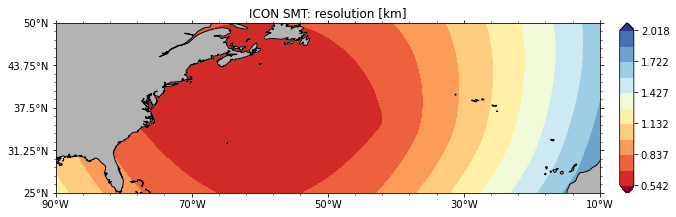

In [85]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, fig_size_fac=1.5, asp=0.3,
                             axlab_kw=None, projection=ccrs_proj,
                             )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
contfs = np.arange(0.,2e3+500.,500.)/1e3
clim = [contfs.min(), contfs.max()]
#clim = 0, 3
hm1 = pyic.shade(lon_010deg[850:1750], lat_010deg[1150:1400], res_010deg[1150:1400,850:1750]/1e3,
                 ax=ax, cax=cax, contfs=True,
                 transform=ccrs_proj, rasterized=False,
                 cmap=plt.cm.RdYlBu,
                 #cbticks=contfs[::2],
                 )
ht = ax.set_title('ICON SMT: resolution [km]')
lon1 = -90,-10
lat1 = 25,50
pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

plt.savefig('../images/resolution/smt_res_z1')

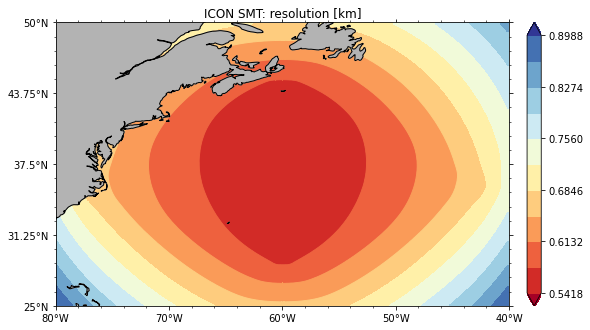

In [86]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, fig_size_fac=2.5, asp=0.6,
                             axlab_kw=None, projection=ccrs_proj,
                             )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
contfs = np.arange(0.,2e3+500.,500.)/1e3
clim = [contfs.min(), contfs.max()]
#clim = 0, 3
hm1 = pyic.shade(lon_010deg[1000:1400], lat_010deg[1150:1400], res_010deg[1150:1400,1000:1400]/1e3,
                 ax=ax, cax=cax, contfs=True,
                 transform=ccrs_proj, rasterized=False,
                 cmap=plt.cm.RdYlBu,
                 #cbticks=contfs[::2],
                 )
ht = ax.set_title('ICON SMT: resolution [km]')
lon1 = -80,-40
lat1 = 25,50
pyic.plot_settings(ax, xlim=lon1, ylim=lat1)

plt.savefig('../images/resolution/smt_res_z2')

Text(0, 0.5, 'res [m]')

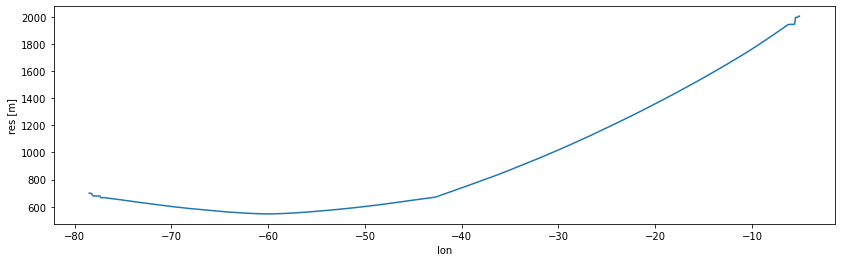

In [87]:
#peak bei 547m bei 35°
fig = plt.figure(figsize=(14,4))
plt.plot(lon_010deg[950:1750], res_010deg[1250, 950:1750])
plt.xlabel('lon')
plt.ylabel('res [m]')
#plt.ylim([500,1300])

## resolution of slice

In [88]:
npoints = 4000

sname         = 'A'
tgname        = 'SMT'
gname         = 'OceanOnly_SubmesoNA_2500m_srtm30'
path_tgrid    = f'/pool/data/ICON/oes/grids/OceanOnly/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is stored

lonl = -80.5, -48
lon = lonl
lat = 31.9, 31.9

dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon[1],lat[0]], p2=[lon[0],lat[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/SMT_nps4000_48W31.9N_80.5W31.9N.npz


### smt grid resolution

In [89]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(cell=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("cell", lon_sec)})
grid_smt = grid.assign_coords({"lat_sec": ("cell", lat_sec)})
# section distance
d_smt_sec = (grid_smt.lon_sec[0] - grid_smt.lon_sec[1]).data *delta[32]
d_smt_hi_res = grid_smt.max().data

print('max',grid_smt.max().data, 'min', grid_smt.min().data, 'distance section', d_smt_sec)

max 787.4848864863045 min 554.3990887684248 distance section 763.3478845889707


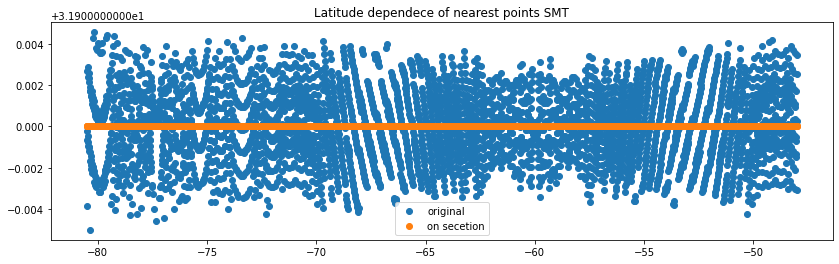

In [90]:
fig = plt.figure(figsize=(14,4))
plt.scatter(grid_smt.clon, grid_smt.clat, label='original')
plt.scatter(grid_smt.lon_sec, grid_smt.lat_sec, label='on secetion')
plt.title('Latitude dependece of nearest points SMT')
plt.legend()
plt.savefig('../images/resolution/smt_sec_nnM')

Text(0.5, 1.0, 'Resolution of Original grid and spacing of section sampling SMT')

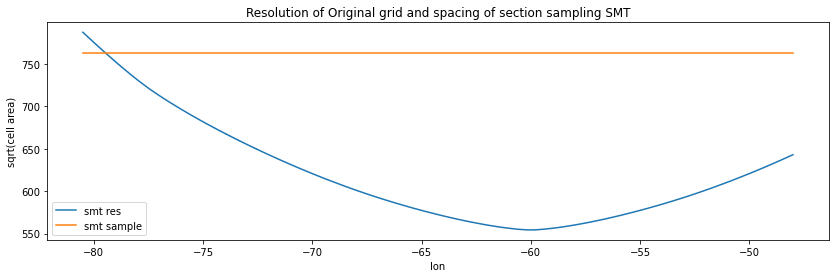

In [91]:
fig = plt.figure(figsize=(14,4))
grid_smt.plot(x="clon", label='smt res')
plt.plot(lon, ([d_smt_sec, d_smt_sec]), label='smt sample')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area)')
plt.legend()
plt.title('Resolution of Original grid and spacing of section sampling SMT')

## r2b8

In [92]:
gname   = 'r2b8_oce_r0004_tgrid'
path_tgrid    = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/'
fname_tgrid   = f'{gname}.nc'

In [93]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
res = np.sqrt(sgrid.cell_area_p)
fpath_ckdtree_res = '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_ckdtree/rectgrids/r2b8_res0.10_180W-180E_90S-90N.npz'
ddnpz = np.load(fpath_ckdtree_res)
lon_010deg = ddnpz['lon']
lat_010deg = ddnpz['lat']
res_010deg = pyic.apply_ckdtree(res, fpath_ckdtree_res, coordinates='clat clon', radius_of_influence=100000.).reshape(lat_010deg.size, lon_010deg.size)
res_010deg[res_010deg==0.] = np.ma.masked

/work/mh0033/u241317/pyicon/pyicon/pyicon_plotting.py:646: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=hm, cax=cax, orientation=cborientation, extend='both')


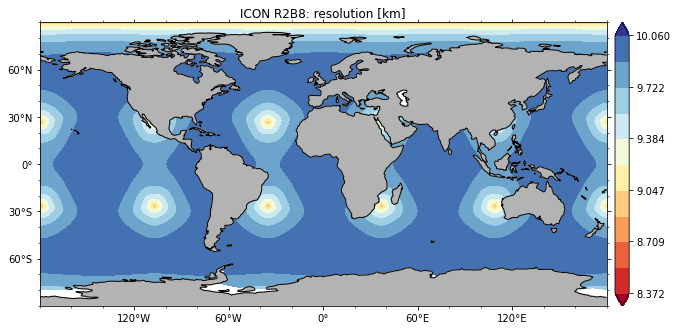

In [94]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, fig_size_fac=2.5, asp=0.5,
                             axlab_kw=None, projection=ccrs_proj,
                             )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
contfs = np.arange(0.,11e3+500.,500.)/1e3
clim = [contfs.min(), contfs.max()]
hm1 = pyic.shade(lon_010deg, lat_010deg, res_010deg/1e3,
                 ax=ax, cax=cax, contfs=True,
                 transform=ccrs_proj, rasterized=False,
                 cmap=plt.cm.RdYlBu,
                 )
ht = ax.set_title('ICON R2B8: resolution [km]')



pyic.plot_settings(ax, template='global')

plt.savefig('../images/resolution/r2b8_res')

In [134]:
lat_reg

(31.9, 31.9)

In [9]:
npoints = 300

sname   = 'A'
tgname  = 'B'
gname   = 'r2b8_oce_r0004_tgrid'
path_tgrid    = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/r2b8_oce_r0004/'
fname_tgrid   = f'{gname}.nc'
path_scratch  = f'/scratch/u/u241317/tmp/'
path_ckdtree  = path_scratch # where grid is saved

lon_reg = -80.5, -48
lat_reg = 31.9, 31.9


dckdtree, ickdtree, lon_sec, lat_sec, dist_sec = pyic.ckdtree_section(p1=[lon_reg[1],lat_reg[0]], p2=[lon_reg[0],lat_reg[0]], npoints=npoints,
                      fname_tgrid  = fname_tgrid,
                      path_tgrid   = path_tgrid,
                      path_ckdtree = path_ckdtree,
                      sname = sname,
                      gname = gname,
                      tgname = tgname,
                      load_egrid=False,
                      load_vgrid=False,
                      )

Saving grid file: /scratch/u/u241317/tmp/B_nps300_48W31.9N_80.5W31.9N.npz


In [10]:
sgrid = xr.open_dataset(path_tgrid + fname_tgrid)
grid  = sgrid.cell_area_p.compute()
Clon  =  grid.clon * 180/np.pi
grid  = grid.assign_coords(clon=Clon)
Clat  =  grid.clat * 180/np.pi
grid  = grid.assign_coords(clat=Clat)
grid  = np.sqrt(grid.isel(ncells=ickdtree))
grid  = grid.assign_coords({"lon_sec": ("ncells", lon_sec)})
grid_r2b8 = grid.assign_coords({"lat_sec": ("ncells", lat_sec)})
# section distance
d_r2b8_sec = (grid_r2b8.lon_sec[0] - grid_r2b8.lon_sec[1]).data *delta[32]
d_r2b8_hi_res = grid_r2b8.min().data

print('max',grid_r2b8.max().data, 'min', grid_r2b8.min().data, 'distance section', d_r2b8_sec)

max 9965.12512967416 min 9705.941189521574 distance section 10209.458831011232


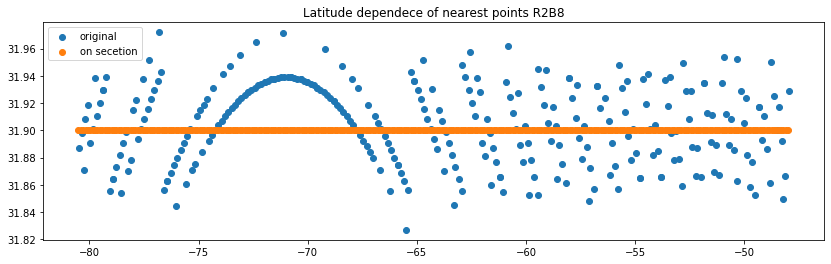

In [11]:
fig = plt.figure(figsize=(14,4))
plt.scatter(grid_r2b8.clon, grid_r2b8.clat, label='original')
plt.scatter(grid_r2b8.lon_sec, grid_r2b8.lat_sec, label='on secetion')
plt.title('Latitude dependece of nearest points R2B8')
plt.legend()
plt.savefig('../images/resolution/r2b8_sec_nnM')

Text(0.5, 1.0, 'Resolution of Original grid and spacing of section sampling R2B8')

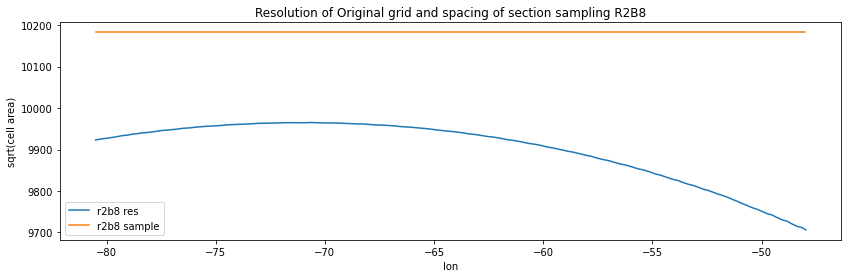

In [130]:
fig = plt.figure(figsize=(14,4))
grid_r2b8.plot(x="clon", label='r2b8 res')
plt.plot(lon_reg, ([d_r2b8_sec, d_r2b8_sec]), label='r2b8 sample')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area)')
plt.legend()
plt.title('Resolution of Original grid and spacing of section sampling R2B8')

## aviso sst satellite 

In [99]:
path_data  = '/pool/data/ICDC/ocean/modis_aqua_sst/DATA/monthly/2010/'
search_str = f'MODIS-AQUA__C6__SST_v2019.0__4km__2010*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [100]:
sata = xr.open_mfdataset(flist[:90], combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
#sst_sat = sata.where((sata.lat > lat_reg[0]) & (sata.lat < lat_reg[1]) & (sata.lon > lon_reg[0]) & (sata.lon < lon_reg[1]), drop=True)
sat = sata.isel(time=0)


In [101]:
d_sat = sat.lon[1] - sat.lon[0]
d_sat_res = d_sat.data * delta[32]
d_sat.data

array(0.04167175, dtype=float32)

In [102]:
r = 6371000
const_lat = 32 # latitude of section
latitude = np.linspace(-90,90,180)
delta = 2*np.pi*r/360*np.cos(latitude/90* np.pi/2)
print('distance of one degree in meter at equator', delta[90])
print('distance of one degree in meter at section', delta[const_lat])

distance of one degree in meter at equator 111190.64524379587
distance of one degree in meter at section 59218.271549443656


In [103]:
lo = 360
la = 180
lon = np.linspace(-180,180,360)
m = np.ones([lo,la])
m = m * delta
m = m * d_sat.data

/work/mh0033/u241317/pyicon/pyicon/pyicon_plotting.py:646: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=hm, cax=cax, orientation=cborientation, extend='both')


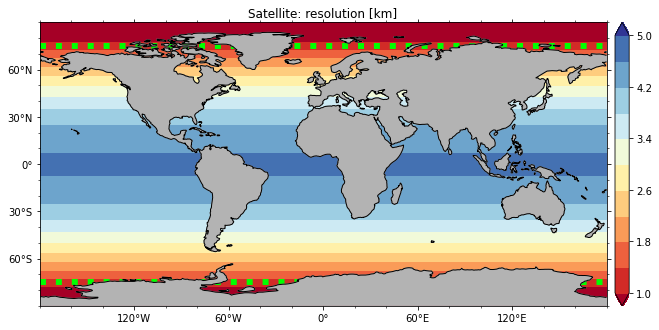

In [104]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, fig_size_fac=2.5, asp=0.5,
                             axlab_kw=None, projection=ccrs_proj,
                             )
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
contfs = np.arange(0.,11e3+500.,500.)/1e3
clim = [contfs.min(), contfs.max()]
clim = 1, 5
hm1 = pyic.shade(lon, latitude, m.transpose()/1e3,
                 ax=ax, cax=cax, contfs=True, clim = clim,
                 transform=ccrs_proj, rasterized=False,
                 cmap=plt.cm.RdYlBu,
                 )

ht = ax.set_title('Satellite: resolution [km]')
pyic.plot_settings(ax, template='global')

lonl = -180, 180
latl = 75, 75
ax.plot(lonl, latl, transform=ccrs_proj, linewidth=6, linestyle=':', color='lime')
latl = -75, -75
ax.plot(lonl, latl, transform=ccrs_proj, linewidth=6, linestyle=':', color='lime')
plt.savefig('../images/resolution/satellite_res')

## compare

In [105]:
print('in meter:' , 'smt hi res', d_smt_hi_res, 'smt section', d_smt_sec, 'r2b8 hi res', d_r2b8_hi_res, 'r2b8 section', d_r2b8_sec, 'satellite hi res at section', d_sat_res)

in meter: smt hi res 787.4848864863045 smt section 763.3478845889707 r2b8 hi res 9705.941189521574 r2b8 section 10209.458831011232 satellite hi res at section 3914.1036227557556


ValueError: x and y must have same first dimension, but have shapes (360,) and (2,)

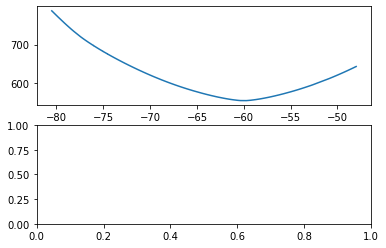

In [106]:
fig, ax = plt.subplots(2)
ax[0].plot(grid_smt.clon, grid_smt, label = 'smt orig res')
#smt sampling
y = d_smt_sec, d_smt_sec
x = lon
ax[0].plot(x,y,'--', label='smt_sampling')
ax[0].set_ylabel('sqrt(cell area) [m]')
ax[0].legend()

ax[1].plot(grid_r2b8.clon, grid_r2b8, label = 'r2b8 orig res')

#r2b8 sampling
y = d_r2b8_sec, d_r2b8_sec
x = lon
ax[1].plot(x,y,'--', label='r2b8_sampling')
plt.xlabel('lon')
plt.ylabel('sqrt(cell area) [m]')
plt.legend()

In [ ]:
fig = plt.figure(figsize=(4,8))
plt.plot(grid_smt.clon, grid_smt, label = 'smt orig res')
#smt sampling
y = d_smt_sec, d_smt_sec
x = lon
plt.plot(x,y,'--', label='smt_sampling')
plt.plot(grid_r2b8.clon, grid_r2b8, label = 'r2b8 orig res')

#r2b8 sampling
y = d_r2b8_sec, d_r2b8_sec
x = lon
plt.plot(x,y,'--', label='r2b8_sampling')
#satellite sampling
y = d_sat_res, d_sat_res
x = lon
plt.plot(x,y,'--', label='satellite orig res')

plt.xlabel('lon')
plt.ylabel('sqrt(cell area) [m]')
plt.legend()
plt.savefig('../images/resolution/resolution_comparison')